# Demo: Analyzing Market Data Across Time

In [1]:
# Initial imports
import pandas as pd
from path import Path

In [2]:
# Read the new S&P 500 CSV data into a DataFrame
df_sp500 = pd.read_csv(
    Path("../Resources/sp500.csv")
)

# Display the DataFrame
df_sp500.head()
df_sp500.tail()

,time,close
9323,2019-12-30 20:30:00+00:00,321.10
9324,2019-12-30 20:45:00+00:00,321.12
9325,2019-12-30 21:00:00+00:00,321.23
9326,2019-12-30 21:30:00+00:00,321.23
9327,2019-12-30 21:45:00+00:00,321.20


In [3]:
# Transform time column to datetime
df_sp500["time"] = pd.to_datetime(
    df_sp500["time"],
    # infer_datetime_format=True,
    utc=True
)

# Convert the time column to the US/Estern timezone
df_sp500["time"] = df_sp500["time"].dt.tz_convert("US/Eastern")

# Verify data type transformation
df_sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9328 entries, 0 to 9327
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype                     
---  ------  --------------  -----                     
 0   time    9328 non-null   datetime64[ns, US/Eastern]
 1   close   9328 non-null   float64                   
dtypes: datetime64[ns, US/Eastern](1), float64(1)
memory usage: 145.9 KB


In [4]:
# Set the time column as DataFrame index
df_sp500 = df_sp500.set_index('time')
# Display the DataFrame
df_sp500


,close
time,
2019-01-02 07:45:00-05:00,246.16
2019-01-02 08:00:00-05:00,246.15
2019-01-02 08:15:00-05:00,245.50
2019-01-02 08:30:00-05:00,245.71
2019-01-02 08:45:00-05:00,245.76
...,...
2019-12-30 15:30:00-05:00,321.10
2019-12-30 15:45:00-05:00,321.12
2019-12-30 16:00:00-05:00,321.23


In [5]:
df_sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9328 entries, 2019-01-02 07:45:00-05:00 to 2019-12-30 16:45:00-05:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   9328 non-null   float64
dtypes: float64(1)
memory usage: 145.8 KB


In [6]:
# Querying individual date and time components
display(df_sp500.index.year)
display(df_sp500.index.month)
display(df_sp500.index.quarter)

Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
       ...
       2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
      dtype='int32', name='time', length=9328)

Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       ...
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
      dtype='int32', name='time', length=9328)

Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       ...
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
      dtype='int32', name='time', length=9328)

<Axes: xlabel='time'>

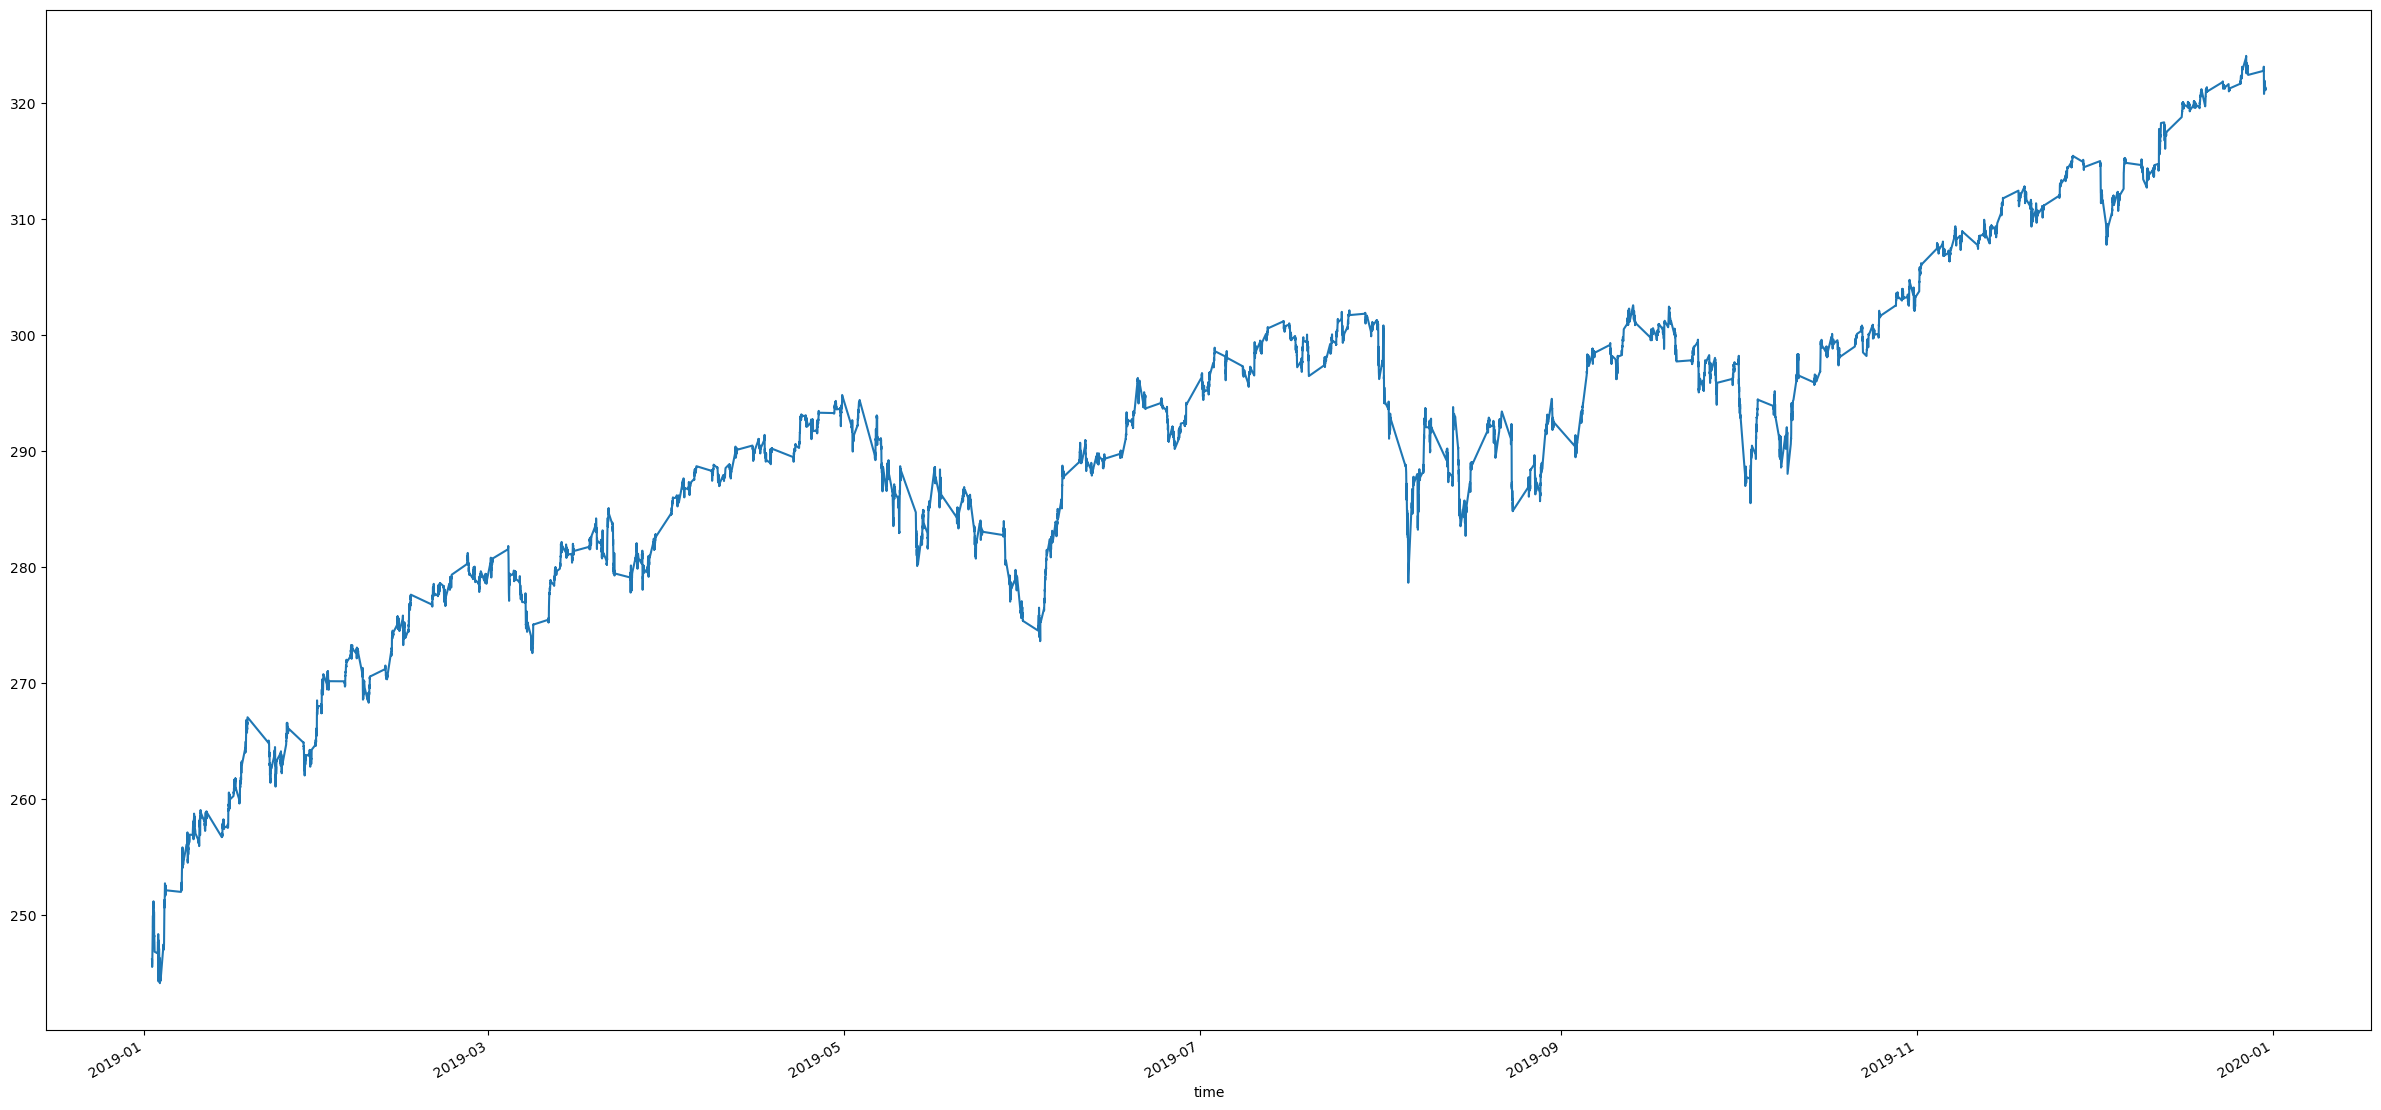

In [8]:
# Plot the close column to examine the trend for closing prices
df_sp500.close.plot(figsize=[30,15])

In [9]:
# Pick a single date from the DataFrame
# Display the first 20 rows
df_sp500.loc["2019-12-30"].head(20)

,close
time,
2019-12-30 07:45:00-05:00,322.770
2019-12-30 08:00:00-05:00,322.890
2019-12-30 08:15:00-05:00,322.880
2019-12-30 08:30:00-05:00,322.950
2019-12-30 09:00:00-05:00,323.130
2019-12-30 09:15:00-05:00,323.000
2019-12-30 09:30:00-05:00,321.550
2019-12-30 09:45:00-05:00,321.470
2019-12-30 10:00:00-05:00,320.780


In [14]:
# Picking specific times from a datetime range
df_sp500.loc["2019-10-30 08:45:00-04:00":"2019-10-30 10:45:00-04:00"]

,close
time,
2019-10-30 08:45:00-04:00,303.420
2019-10-30 09:00:00-04:00,303.480
2019-10-30 09:15:00-04:00,303.420
2019-10-30 09:30:00-04:00,302.890
2019-10-30 09:45:00-04:00,302.870
2019-10-30 10:00:00-04:00,302.855
2019-10-30 10:15:00-04:00,302.920
2019-10-30 10:30:00-04:00,302.865
2019-10-30 10:45:00-04:00,303.060


<Axes: xlabel='time'>

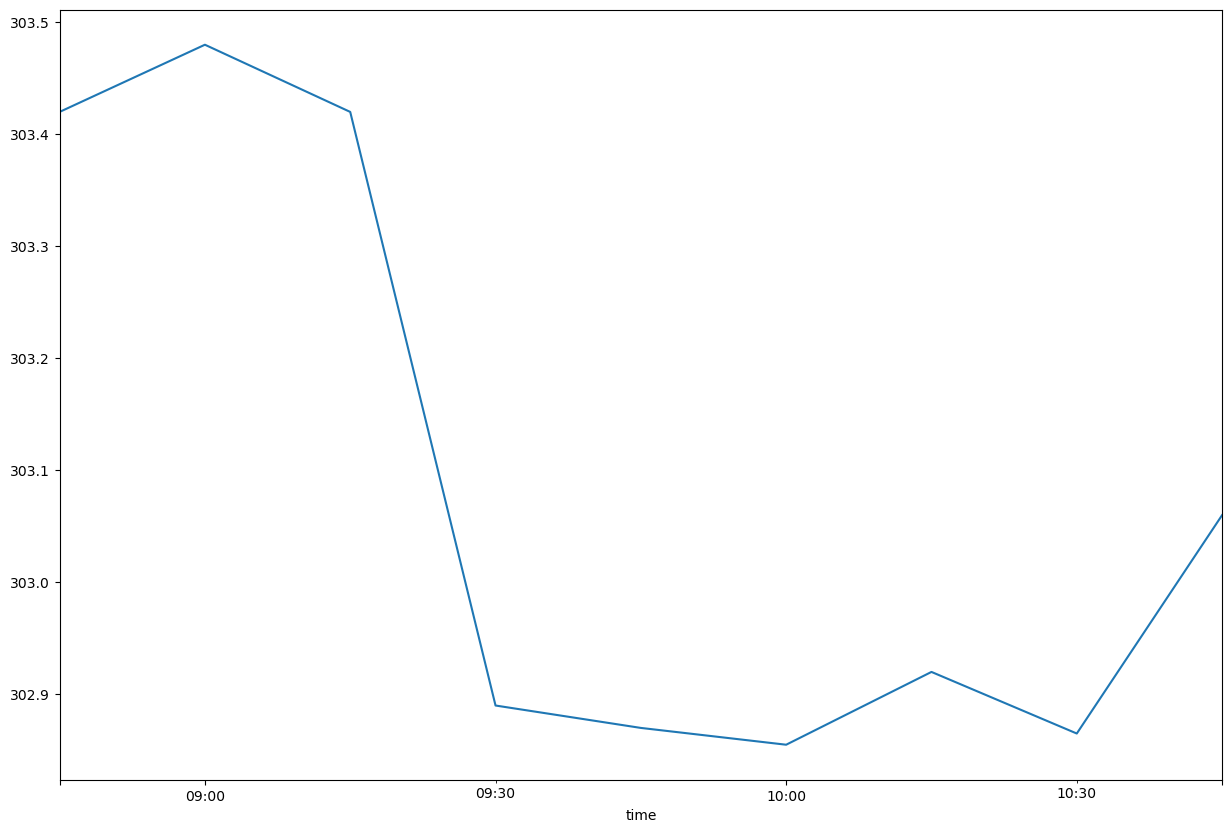

In [16]:
# Plotting pre-market hours trading (7:00 am - 9:30 am)
df_sp500.loc["2019-10-30 08:45:00-04:00":"2019-10-30 10:45:00-04:00"].close.plot(figsize=[15,10])

<Axes: xlabel='time'>

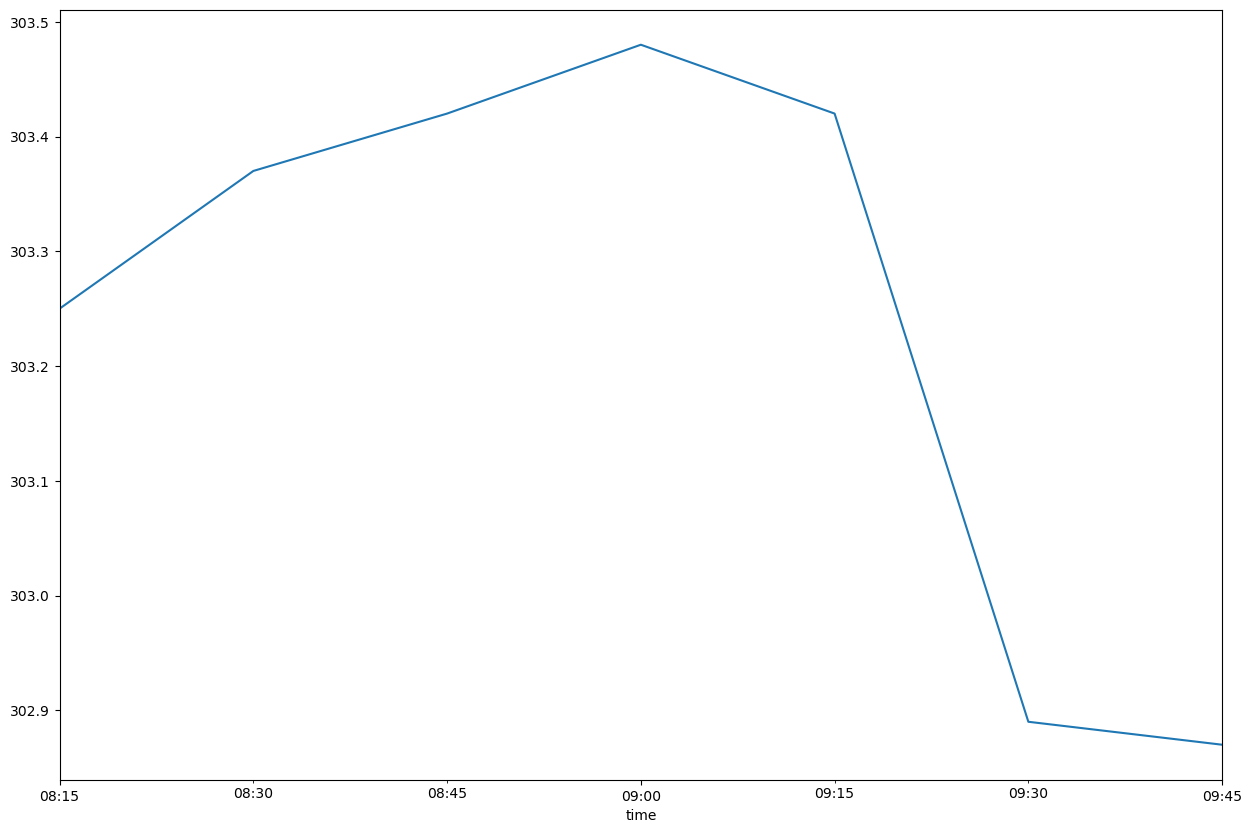

In [18]:
# When the stock market opens there is usually an initial push in one direction
df_sp500.loc["2019-10-30 07:45:00-04:00":"2019-10-30 9:45:00-04:00"].close.plot(figsize=[15,10])

<Axes: xlabel='time'>

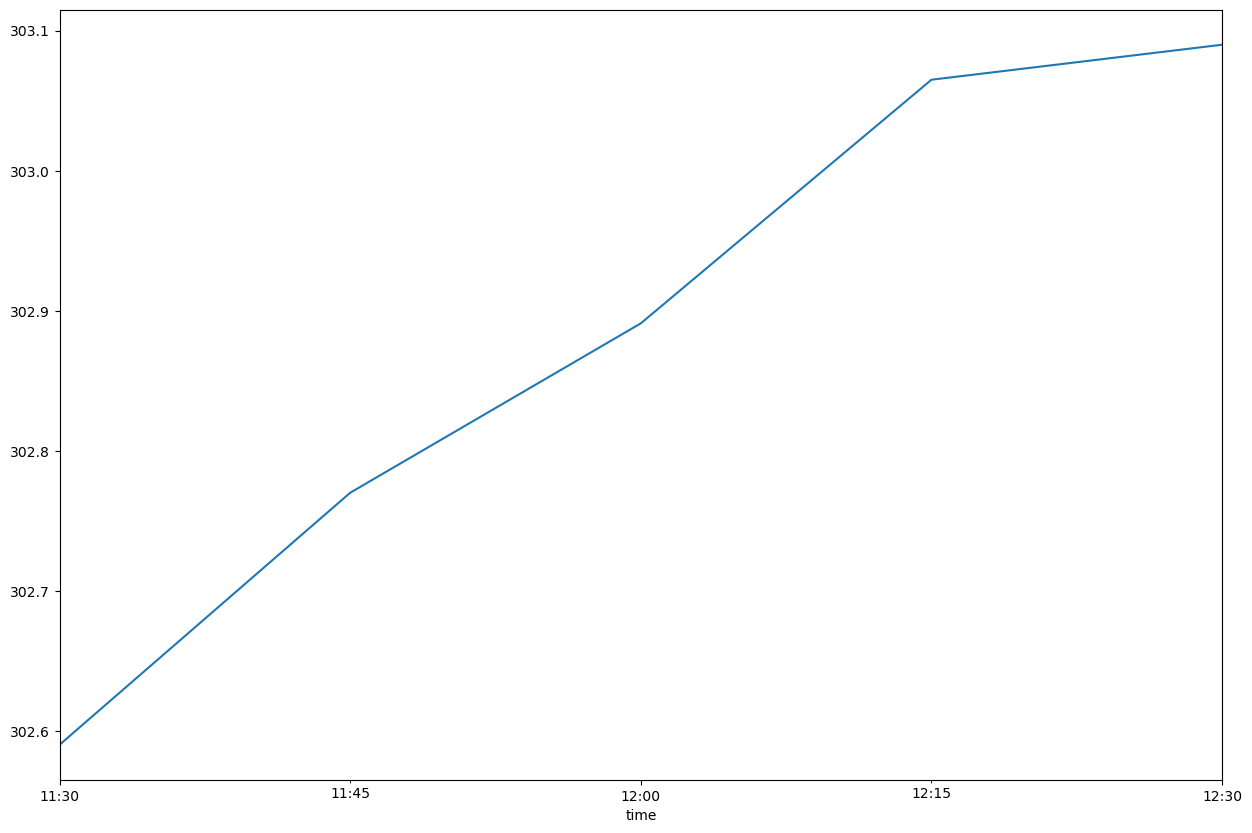

In [20]:
# Closing prices during lunch time
df_sp500.loc["2019-10-30 11:30:00-04:00":"2019-10-30 12:30:00-04:00"].close.plot(figsize=[15,10])

In [24]:
df_sp500.loc["2019-10-30"]

,close
time,
2019-10-30 08:15:00-04:00,303.250
2019-10-30 08:30:00-04:00,303.370
2019-10-30 08:45:00-04:00,303.420
2019-10-30 09:00:00-04:00,303.480
2019-10-30 09:15:00-04:00,303.420
2019-10-30 09:30:00-04:00,302.890
2019-10-30 09:45:00-04:00,302.870
2019-10-30 10:00:00-04:00,302.855
2019-10-30 10:15:00-04:00,302.920


<Axes: xlabel='time'>

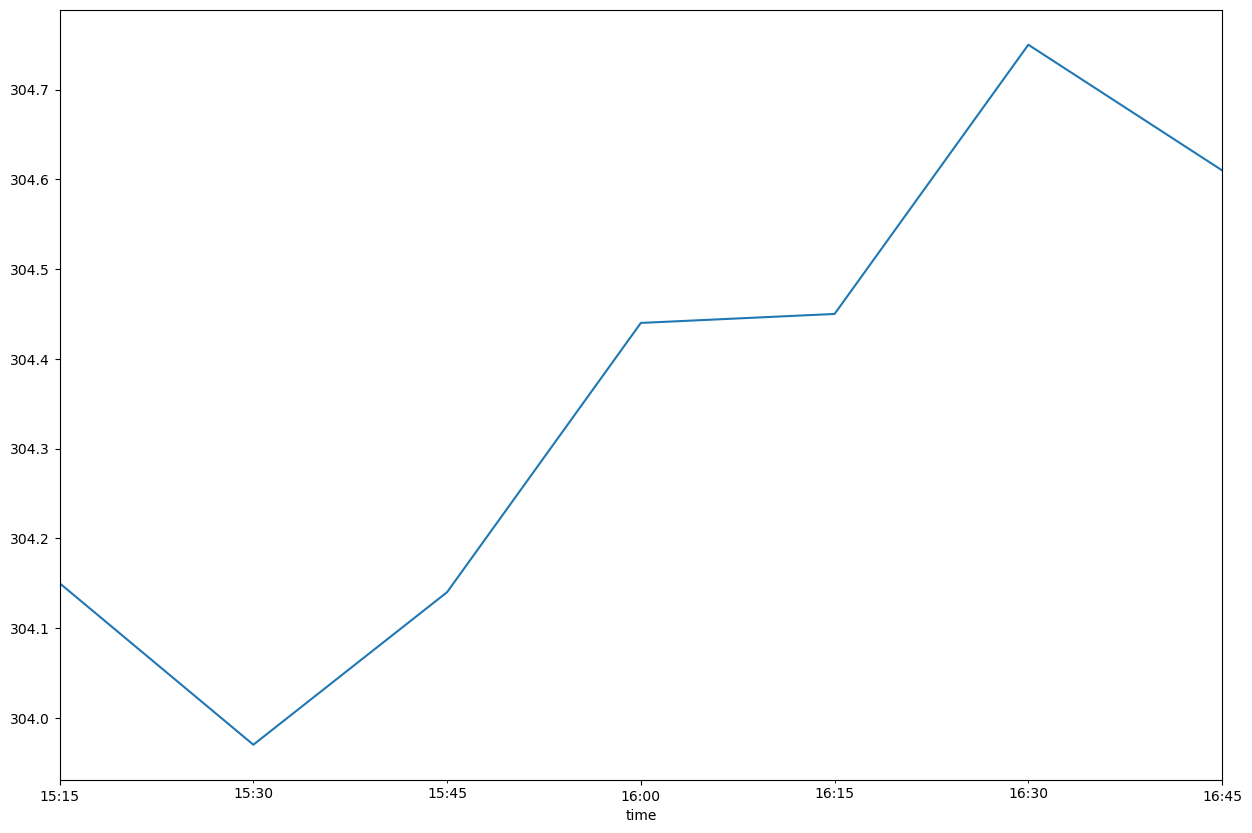

In [26]:
# Closing prices just a little over an hour before market close
df_sp500.loc["2019-10-30 15:15:00-04:00":"2019-10-30 16:45:00-04:00"].close.plot(figsize=[15,10])

<Axes: xlabel='time'>

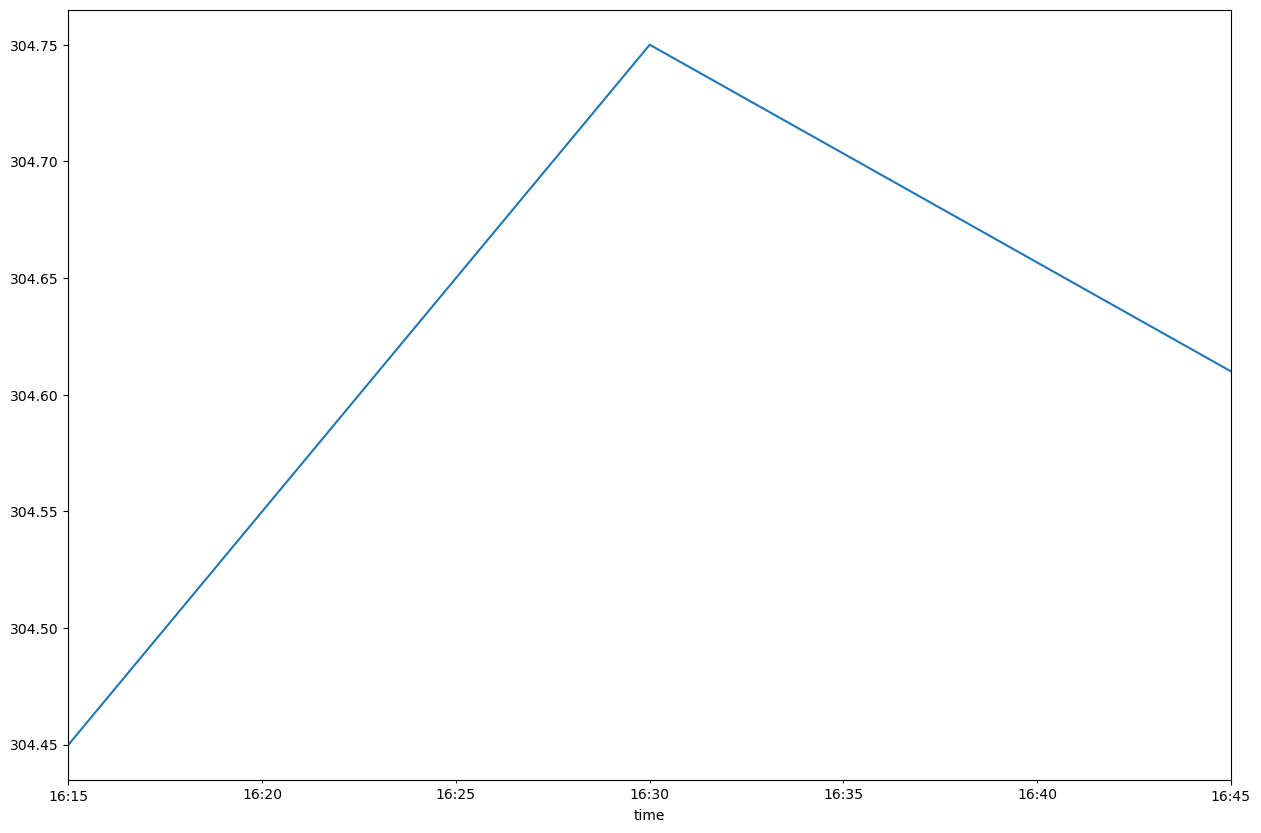

In [28]:
# Closing prices thirty minutes before market closes
df_sp500.loc["2019-10-30 16:15:00-04:00":"2019-10-30 16:45:00-04:00"].close.plot(figsize=[15,10])